In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/Simple_Petrpphysical_Workflow/HW-10.las' 
    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/Simple_Petrpphysical_Workflow/data.ZIP'
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    !pip install lasio
    !pip install jupyter_bokeh
    
    !unzip data


# Reservoir Characterization Workflow: Read in LAS Well Log Data


We have used the new hierarchical carbonate reservoir benchmarking case study created by Costa Gomes J, Geiger S, Arnold D to be used for reservoir characterization, uncertainty quantification and history matching(1)

## Explore well log data using Andy McDonalds methods dicussed in his Petrophysical Python Series


1.  Costa Gomes J, Geiger S, Arnold D. The Design of an Open-Source Carbonate Reservoir Model. Petroleum Geoscience,
    https://doi.org/10.1144/petgeo2021-067



---

## Python Requirements:

In [3]:
import warnings
warnings.filterwarnings("ignore")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import lasio
import math

import ipywidgets as widgets

import panel as pn


# Suggested by Hoxbro at Panel
###################plt.switch_backend("agg")


pn.extension()

from bokeh.models.formatters import PrintfTickFormatter
from bokeh.models.widgets import Button




## Uncomment the Costa HW Well that you want to evaluate:

In [4]:
#las = lasio.read("HW-3.las");elev_meas_ref = 160
#las = lasio.read("./data/HW-4.las");elev_meas_ref = 29
#las = lasio.read("./data/HW-5.las");elev_meas_ref = 36
#las = lasio.read("./data/HW-6.las");elev_meas_ref = 49
#las = lasio.read("./data/HW-7.las");elev_meas_ref = 367
#las = lasio.read("./data/HW-8.las");elev_meas_ref = 416
#las = lasio.read("./data/HW-9.las");elev_meas_ref = 492
las = lasio.read("HW-10.las");elev_meas_ref = 397
#las = lasio.read("./data/HW-24.las");elev_meas_ref = 426
#las = lasio.read("./data/HW-25.las");elev_meas_ref = 386
#las = lasio.read("./data/HW-26.las");elev_meas_ref = 375
#las = lasio.read("./data/HW-27.las");elev_meas_ref = 453
#las = lasio.read("./data/HW-28.las");elev_meas_ref = 430
#las = lasio.read("./data/HW-29.las");elev_meas_ref = 466
#las = lasio.read("./data/HW-30.las");elev_meas_ref = 590
#las = lasio.read("./data/HW-31.las");elev_meas_ref = 417
#las = lasio.read("./data/HW-32.las");elev_meas_ref = 441


In [5]:
df_log = las.df()

df_log['DEPT']=df_log.index

df_log.describe()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM,DEPT
count,381.000000,381.000000,381.000000,0.0,381.000000,381.000000,160.000000,160.000000,311.000000,311.000000,381.000000
mean,12.346719,2.410236,0.187402,NaN,0.182047,4.944278,0.669063,0.330937,23.070740,12.134534,8535.000000
std,6.704469,0.165094,0.079996,NaN,0.092130,9.043167,0.161995,0.161995,4.518222,33.281485,55.064735
min,5.370000,2.250000,0.020000,NaN,0.000000,0.220000,0.380000,0.000000,8.710000,0.040000,8440.000000
25%,8.610000,2.290000,0.150000,NaN,0.140000,0.440000,0.540000,0.200000,21.075000,1.365000,8487.500000
50%,9.390000,2.330000,0.230000,NaN,0.230000,1.030000,0.670000,0.330000,24.830000,2.770000,8535.000000
75%,11.980000,2.480000,0.250000,NaN,0.250000,2.670000,0.800000,0.460000,26.325000,5.950000,8582.500000
max,33.940000,2.750000,0.270000,NaN,0.270000,38.180000,1.000000,0.620000,31.800000,345.340000,8630.000000


# Visualising Data Extent (from Andy McDonald):

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [6]:
well_nan = df_log.notnull() * 1

In [7]:
well_nan.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM,DEPT
DEPT,,,,,,,,,,,
8440.0,1,1,1,0,1,1,0,0,0,0,1
8440.5,1,1,1,0,1,1,0,0,0,0,1
8441.0,1,1,1,0,1,1,0,0,0,0,1
8441.5,1,1,1,0,1,1,0,0,0,0,1
8442.0,1,1,1,0,1,1,0,0,0,0,1


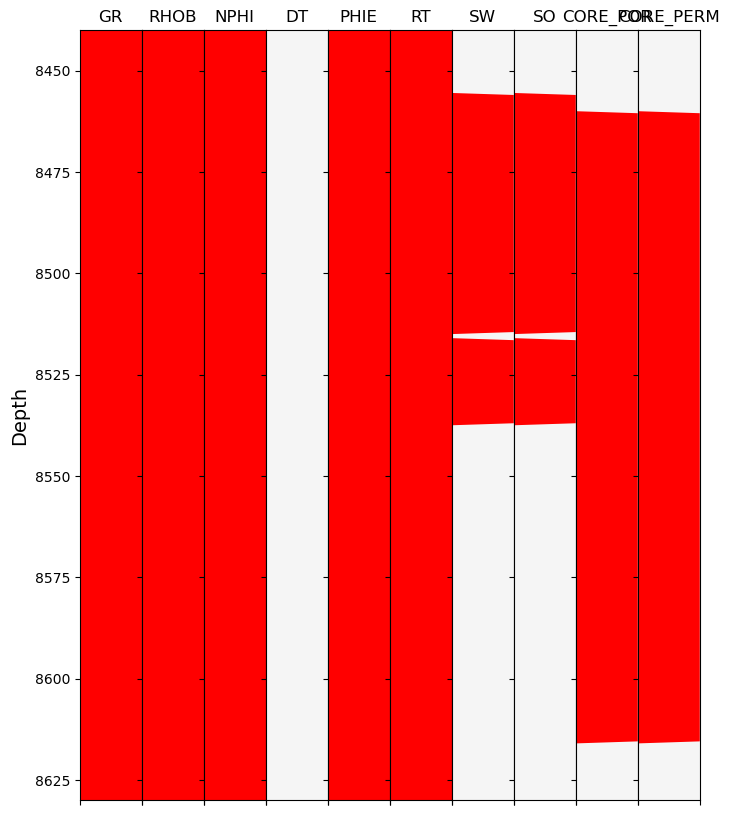

In [8]:
fig = plt.subplots(figsize=(8,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,10) , (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,10) , (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,10) , (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,10) , (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,10) , (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,10) , (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,10) , (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,10) , (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1)



columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    #ax.set_ylim(3000, 0)
    ax.set_ylim(max(las["DEPT"]),min(las["DEPT"]))
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

# **Depth Plots**

## Assign log curves from las file:

In [9]:
deptharray  = las['DEPT']
DEPT        = las['DEPT']
GR          = las['GR']
CNL         = las['NPHI']
RHOB        = las['RHOB']
porden      = (2.71-RHOB)/(2.72 - 1.1)
Phie        = las['PHIE']
gr          = las['GR']
ild         = las['RT']
perm        = las['CORE_PERM']
cpor        = las['CORE_POR']/100

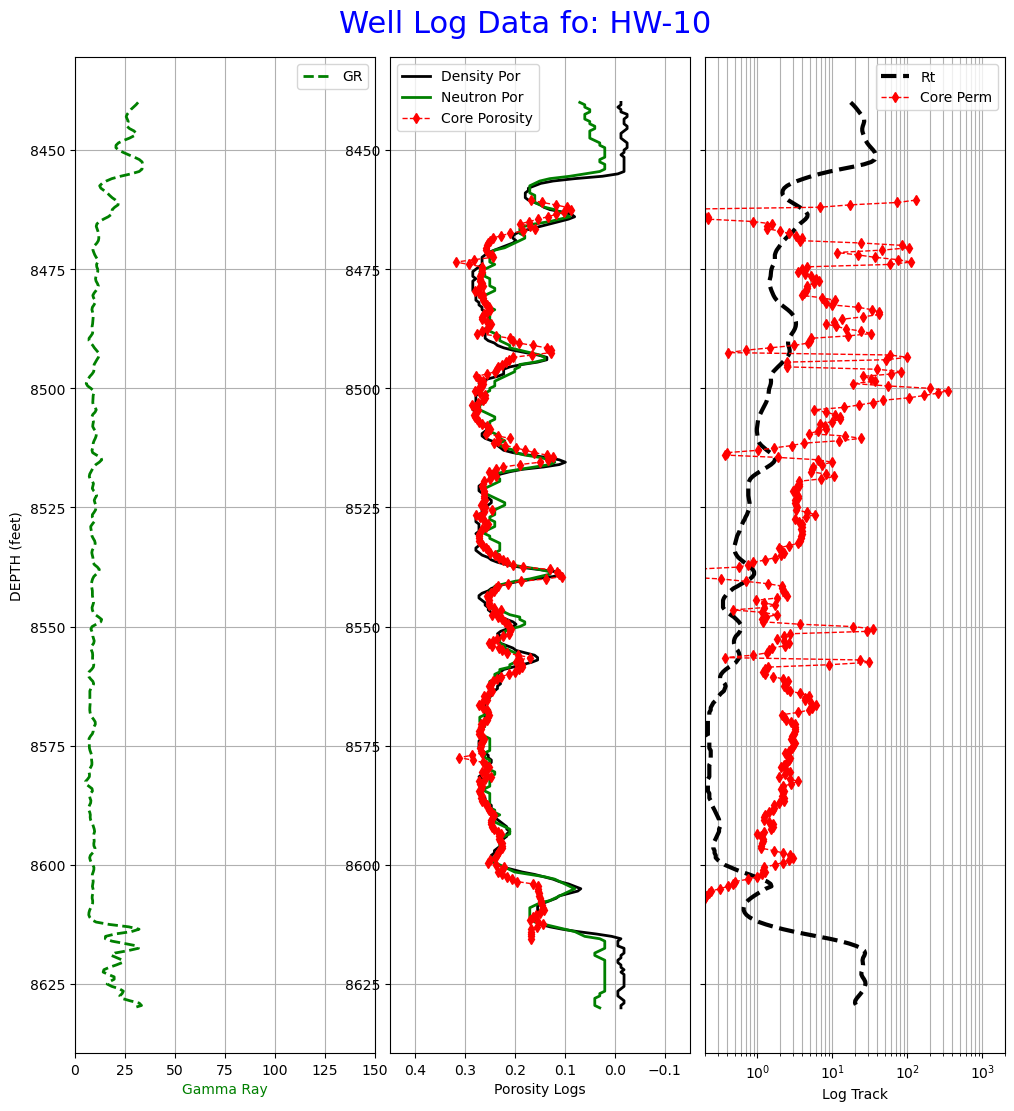

In [10]:
fig = plt.figure(figsize=(12,12))
wellname=las.well.well.value
fig.suptitle('Well Log Data fo: %s'%wellname, fontsize=22, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)

gs = gridspec.GridSpec(1, 3)
ax0 = fig.add_subplot(gs[:,0])
ax1= fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

y=np.array(deptharray)

# Porosity Logs
ax0.plot(GR, y,  '--',  color = 'green', lw=2, label= 'GR')
ax0.set_xlabel("Gamma Ray",color='green')
ax0.set_ylabel('DEPTH (feet)')
ax0.invert_yaxis()
ax0.grid(True)
ax0.set_xlim(0, 150)
ax0.legend()


# Porosity Logs
ax1.plot(porden, y, '-', color = 'black', lw=2, label= 'Density Por')
ax1.plot(CNL,    y, '-', color = 'green', lw=2, label= 'Neutron Por')
ax1.plot(cpor,   y, '--', color='red',marker = 'd', ms = 5, lw=1, label= 'Core Porosity')

ax1.set_xlabel("Porosity Logs",color='black')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.legend()



# log track
ax2.semilogx(ild, y,'--',color = 'black', lw=3, label= 'Rt')
ax2.semilogx(perm, y, '--', color='red',marker = 'd', ms = 5, lw=1, label= 'Core Perm')
ax2.set_xlabel("Log Track",color='black')
ax2.set_xlim(0.2, 2000)
ax2.tick_params(labelleft=False, top=False, labeltop=False, bottom=True, labelbottom=True)
ax2.legend()
ax2.invert_yaxis()
ax2.grid(True, which="both")





# **Chart Book Neutron/Density Porosity using kNN and then Scipy Optimization used to Estimate Lithology:**

The objective of this portion of this notebook is to calculate a Neutron vs. Bulk Density Cross-Plot Total porosity using the Schlumberger CNL or TNPH Charts. It is important to use the proper Neutron chart for either fresh or saline fluid densities as specified. The Neutron logs should also be on limestone matrix units with these charts. 

This program uses as training data the Neutron Porosity (V/V) vs. Bulk Density (G/CC) with porosities taken from the actual charts that we have digitized. The chartbook porosity estimations are made using kNN. Knn is used because it does provide a transparent solution. We normalize the Neutron porosity and Bulk Density curves before making any Euclidian distance calculations, and then use a kNN of 3 (?) to estimate the Cross-Plot porosity values from our data set.   

This program has been tested for the charts available showing good agreement with the training data for the calculated porosities. Further testing is recommended before using this program to better understand the uncertainties in the estimations and validate using a KNN of 3. 

We have 4 sets of chart files representing 4 of the Schlumberger charts: 2 fluid densities for CNL and 2 for TNPH. Other vendor charts could also be included as needed. 

In [11]:
"""
# =============================================================================
# # ======================================================================= # #
# # # 
# # #      Read in Digitized Chartbook data stored in Excel spreadsheet   # # #
# # #
# # ======================================================================= # #
# =============================================================================
"""


#select the proper Neutron-Denisity Chartbook file
''' 
    Schlumberger CNL Neutron Log at different Fluid Densities
'''
#file = r'./data/CNL_1pt0.xlsx'
file = r'./data/CNL_1pt1.xlsx'
''' 
    Schlumberger TNPH Neutron Log at different Fluid Densities
'''
#file = r'./data/TNPH_1pt0.xlsx'
#file = r'./data/TNPH_1pt19.xlsx'



df_chart = pd.read_excel(file,index_col=False)



CNL_chart  = df_chart['Neutron']
RHOB_chart = df_chart['RHOB']
Rho_Matrix_chart  = df_chart['Rho_Matrix']
Porosity_chart = df_chart['Porosity']     


#Fluid Density
FD = 1.1

## Knn is used to estimate Cross Plot porosity and Rho Matrix from the appropriate chart:

In [12]:
"""
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            This is the beginnin of KNN estimating ND xplt Porosity 
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
"""  

#Fluid Density
FD = 1.1


deptharray = []
porarray   = []; #make list of 0 length
RHOMAA_array = []
Porosity_array = []
rhoarray = []


#log Data
for k in range(0,len(df_log) ,1):  

        cnl_norm  = (CNL[k]-(-0.05))/(0.6-(-0.05))
        rhob_norm = (RHOB[k]-1.9)/(3-1.9)
        


        dist_inv    = []
        dist_cnl    = []
        dist_rhob    = []
        inv_dist_array = []
        Por_weight = []
        Rhomatrix_weight =[]
        CNL_norm = []
        RHOB_norm = []

        dist_inv_total = 0
        Por_total     = 0



        #this is the chartbook_reference_data being used 
        for i in range(0,len(df_chart),1):
        
                CNL_norm.append((CNL_chart[i] - (-0.05)) / (0.6 - (-0.05)))
                RHOB_norm.append((RHOB_chart[i] - 1.9) / (3.0 - 1.9))
                
                #Euclidian Distance
                dist_cnl.append((abs(cnl_norm   - CNL_norm[i])))
                dist_rhob.append( abs(rhob_norm - RHOB_norm[i]))

                if math.sqrt(dist_cnl[i]**2 + dist_rhob[i]**2) > 0:
                    dist_inv.append( 1  /  math.sqrt( dist_cnl[i]**2 + dist_rhob[i]**2)  )
                else:
                    dist_inv.append( 1  /  math.sqrt( 0.0001 + dist_cnl[i]**2 + dist_rhob[i]**2)  )
        
                
                #calculalte weights
                Por_weight      .append(dist_inv[i] * Porosity_chart[i])
                Rhomatrix_weight.append(dist_inv[i] * Rho_Matrix_chart[i])
                
                
        
                inv_dist_array.append(dist_inv[i]);  # add items
        
        # =============================================================================
        ###                    KNN Array
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
                distance_knn_array = [dist_inv, Por_weight, Rhomatrix_weight]
        #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================
        xnorm=np.array(CNL_norm)
        ynorm=np.array(RHOB_norm)
        
            
        #knn_array = np.transpose array
        knn_array = np.transpose(distance_knn_array)
        #print(knn_array)
        
        #Sort array from large to low by column 0 which is dist_inv 
        #xknn=np.array(knn_array)
        
        #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
        mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
        #mat_sort = x[x[:,1].argsort()[::-1]]
        #mat_sort = x[x[:,2].argsort()[::-1]]
        
         
        #------------------------------------------------------------------------------
        #    Number of nearest Neighbors
        #------------------------------------------------------------------------------
        n_neighbors = 3
        #------------------------------------------------------------------------------
        
        dist_inv_total_knn = 0
        por_total_knn      = 0
        rhomatrix_total_knn      = 0
        
        
        
        #kNN Estimates for first 3 rows
        #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
        for i in range(0,n_neighbors,1):
            dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
            por_total_knn  = por_total_knn + mat_sort[i][1]
            rhomatrix_total_knn  = rhomatrix_total_knn + mat_sort[i][2]
        
        
        #back to k values and calculate estimations now
        por_est_knn  = por_total_knn  / dist_inv_total_knn
        rhomatrix_est_knn  = rhomatrix_total_knn  / dist_inv_total_knn
        

#------------------------------------------------------------------------------ 
#            Write Data to arrays
#------------------------------------------------------------------------------
        deptharray.append(DEPT[k]);          # Taken from logs
        porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
        rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix


print(len(porarray))

381


## Depth Plot of  PHIT and RHOMAA from kNN Estimations using Chartbook data as calibration:

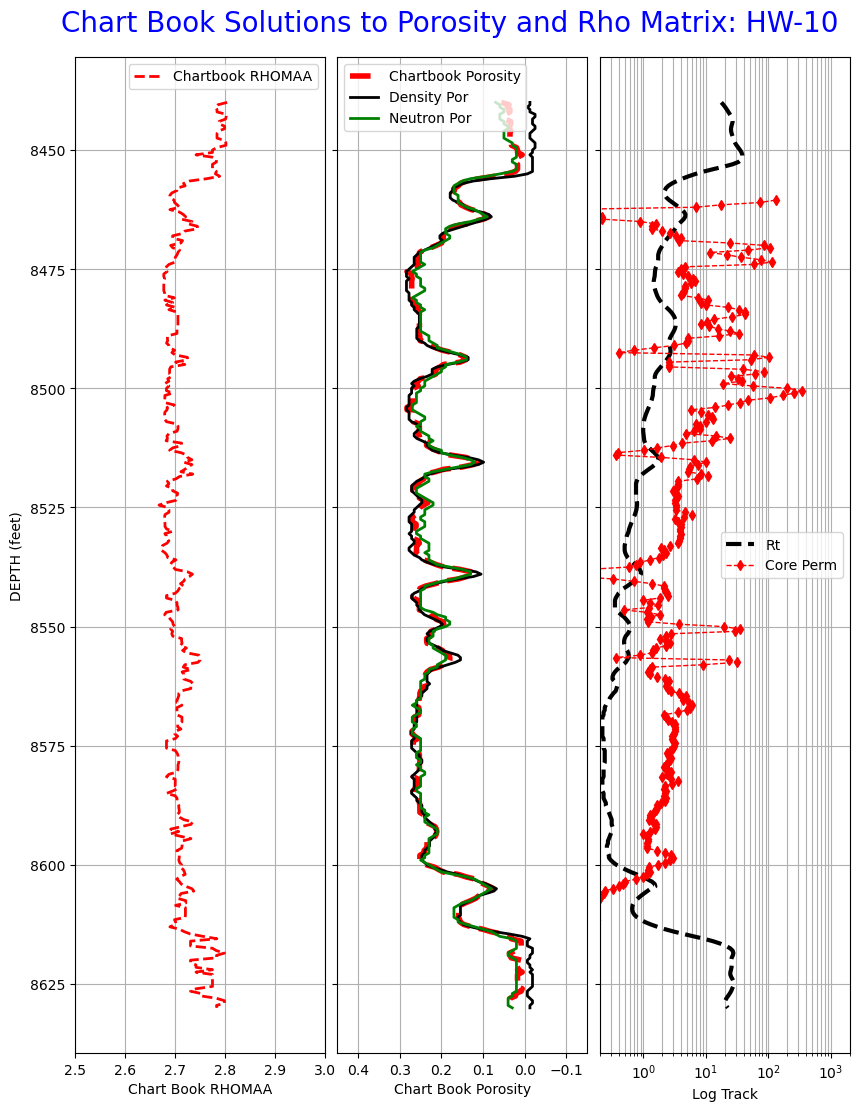

In [13]:
from matplotlib import gridspec

'''     
        deptharray.append(Dep[k]);          # Taken from logs
        porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
        rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix
'''

y=np.array(deptharray)

fig = plt.figure(figsize=(10,12))
wellname=las.well.well.value
fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix: %s'%wellname, fontsize=20, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)


gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])


# Rho Matrix
ax1.plot(rhoarray, y,'--r',lw=2, label= 'Chartbook RHOMAA')  
ax1.tick_params(labelleft=True, top=False, labeltop=False, bottom=True, labelbottom=True)
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlabel("Chart Book RHOMAA",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.set_xlim(2.5, 3)
ax1.legend()


# Porosity
ax2.plot(porarray, y,'--', color = 'red',   lw=4, label= 'Chartbook Porosity')
ax2.plot(porden, y, '-'  , color = 'black', lw=2, label= 'Density Por')
ax2.plot(CNL,    y, '-'  , color = 'green', lw=2, label= 'Neutron Por')
#ax2.plot(cpor,   y, '--', color='red',marker = 'd', ms = 5, lw=1, label= 'Core Porosity')
ax2.tick_params(labelleft=False, top=False, labeltop=False, bottom=True, labelbottom=True)
ax2.invert_yaxis()
ax2.grid(True)
ax2.set_xlabel("Chart Book Porosity",color='black')
ax2.set_xlim(.45, -0.15)
ax2.legend()



# log track
ax3.semilogx(ild, y,'--',color = 'black', lw=3, label= 'Rt')
ax3.semilogx(perm, y, '--', color='red',marker = 'd', ms = 5, lw=1, label= 'Core Perm')
ax3.set_xlabel("Log Track",color='black')
ax3.set_xlim(0.2, 2000)
ax3.tick_params(labelleft=False, top=False, labeltop=False, bottom=True, labelbottom=True)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True, which="both")


# Optimizing Petrophysics solving for Lithology using Scipy Optimize: 

## a) Set lith_option to be either Quartz-Calcite-Dolomite or Calcite-Dolomite
## b) Illite Option: include Illite as Clay (illite_option = 'yes') or Clay-free (illite_option = 'no')

## Which **Lithology Option** do you choose: **Calcite_Dolomite** or **Quartz_Calcite_Dolomite**?

In [14]:
rdbuttons2 = widgets.RadioButtons(
    options = ['Calcite_Dolomite','Quartz_Calcite_Dolomite'],
    value='Calcite_Dolomite',
    layout={'widdt':'max-content'},
    description = 'Lithology Option',
    disabled=False
)


rdbuttons2

RadioButtons(description='Lithology Option', options=('Calcite_Dolomite', 'Quartz_Calcite_Dolomite'), value='C…

## **Illite Option** - Use Illite in lithology calculations (yes or no)?

In [15]:
rdbuttons3 = widgets.RadioButtons(
    options = ['yes','no'],
    value='yes',
    layout={'widdt':'max-content'},
    description = 'Illite Option (yes/no)',
    disabled=False
)


rdbuttons3

RadioButtons(description='Illite Option (yes/no)', options=('yes', 'no'), value='yes')

# **Run cell below to set all options:**

In [16]:
lith_option = rdbuttons2.value
print('lith_option =', lith_option)
print()


illite_option = rdbuttons3.value
print('illite_option =', illite_option)

lith_option = Calcite_Dolomite

illite_option = yes


In [17]:
def Optimization_plot():

    fig = plt.figure(figsize=(18,15))
    #fig.suptitle('Optimized Petrophysical Results',fontsize=32,color='blue')
    #fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
    wellname=las.well.well.value
    fig.suptitle('Optimized Petrophysical Results from: %s'%wellname, fontsize=32, color='blue')
    fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)

    gs = gridspec.GridSpec(1, 7)
    ax1 = fig.add_subplot(gs[:,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    ax4 = fig.add_subplot(gs[0,3])
    ax5 = fig.add_subplot(gs[0,4])
    ax6 = fig.add_subplot(gs[0,5])
    ax7 = fig.add_subplot(gs[0,6])

    y=np.array(deptharray)

    # Porosity Logs
    ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
    ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
    ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
    ax1.set_xlabel("Porosity Logs",color='black')
    ax1.set_ylabel('DEPTH (feet)')
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_xlim(.45, -0.15)
    ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
    ax1.legend()

    # Lithology
    quartz=np.array(VOL_QUARTZ)
    calcite=np.array(VOL_CALCITE)
    dolo=np.array(VOL_DOLO)
    illite=np.array(VOL_ILLITE)

    ax2.plot(illite, y,'-k',lw=2)
    ax2.plot(illite+quartz, y,'-k',lw=2)
    ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
    ax2.plot(illite+quartz+calcite+dolo, y,'-k')
    ax2.set_xlim(0, 1)
    ax2.set_xlabel(('Optimized Lithology'), color='black')
    ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
    ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
    ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
    ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
    ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
    ax2.legend()
    #ax2=ax[2].twiny()
    ax2.invert_yaxis()
    ax2.grid(True)
    #ax2.set_ylabel('DEPTH (feet)')
    ax2.get_yaxis().set_visible(False)


    # Modeled Neutron Log
    ax3.plot(CNL, y,'-g', lw=3, label= 'Neutron Por')
    ax3.plot(tnph_theoretical, y,'-k',lw=1, label= 'Pred Neutron Por')
    ax3.set_xlabel("Modeled Neutron Log",color='black')
    ax3.set_xlim(.45, -0.15)
    ax3.fill_betweenx(y,CNL,tnph_theoretical, color='yellow')#, label= 'VOL_DOLO')
    #ax3.get_yaxis().set_visible(False)
    ax3.legend()
    ax3.invert_yaxis()
    ax3.grid(True)
    #ax3.set_ylabel('DEPTH (feet)')

    # Modeled Density Log
    ax4.plot(RHOB, y,'-r', lw=3, label= 'Bulk Density')
    ax4.plot(rhob_theoretical, y,'-k',lw=1, label= 'Pred Bulk Density')
    ax4.plot(rhoarray, y,'-g',lw=1, label= 'RHOMAA')

    ax4.set_xlabel("Modeled Bulk Density",color='black')
    ax4.set_xlim(2, 3)
    ax4.fill_betweenx(y,RHOB,rhob_theoretical, color='yellow')#, label= 'VOL_DOLO')
    ax4.fill_betweenx(y,error,0, color='red')#, label= 'VOL_DOLO')
    ax4.fill_betweenx(y,rhoarray,2.68, facecolor='#00ff00', hatch='--//', label= 'DOLO')
    #ax4.get_yaxis().set_visible(False)
    ax4.legend()
    ax4.invert_yaxis()
    ax4.grid(True)
    #ax4.set_ylabel('DEPTH (feet)')

    # Error Theoretical vs. Actual normalized logs
    ax5.plot(error, y,'-r', lw=1, label= 'Error')
    ax5.set_xlabel("Calculated Error",color='black')
    ax5.set_xlim(0, 1.0)
    ax5.fill_betweenx(y,error,0.15, color='pink')#, label= 'VOL_DOLO')
    #ax4.get_yaxis().set_visible(False)
    ax5.legend()
    ax5.invert_yaxis()
    ax5.grid(True)
    #ax4.set_ylabel('DEPTH (feet)')


    # Error Theoretical vs. Actual normalized logs
    ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
    #######ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
    ax6.set_xlabel("Bulk Volume Calculations",color='black')
    ax6.set_xlim(0.5, 0.0)
    ######ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
    ############ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
    ax6.legend()
    ax6.invert_yaxis()
    ax6.grid(True)

    # Modeled Density Log
    ax7.plot(gr, y,'-g', lw=3, label= 'GR')
    ax7.plot(gr_theoretical, y,'-k',lw=1, label= 'Pred GR')
    ax7.set_xlabel("Modeled GR",color='black')
    ax7.set_xlim(0, 100)
    ax7.fill_betweenx(y,gr,gr_theoretical, color='yellow')#, label= 'VOL_DOLO')
    #ax7.fill_betweenx(y,error,0, color='red')#, label= 'VOL_DOLO')
    #ax4.get_yaxis().set_visible(False)
    ax7.legend()
    ax7.invert_yaxis()
    ax7.grid(True)
    #ax4.set_ylabel('DEPTH (feet)')

    plt.show()
    #return fig


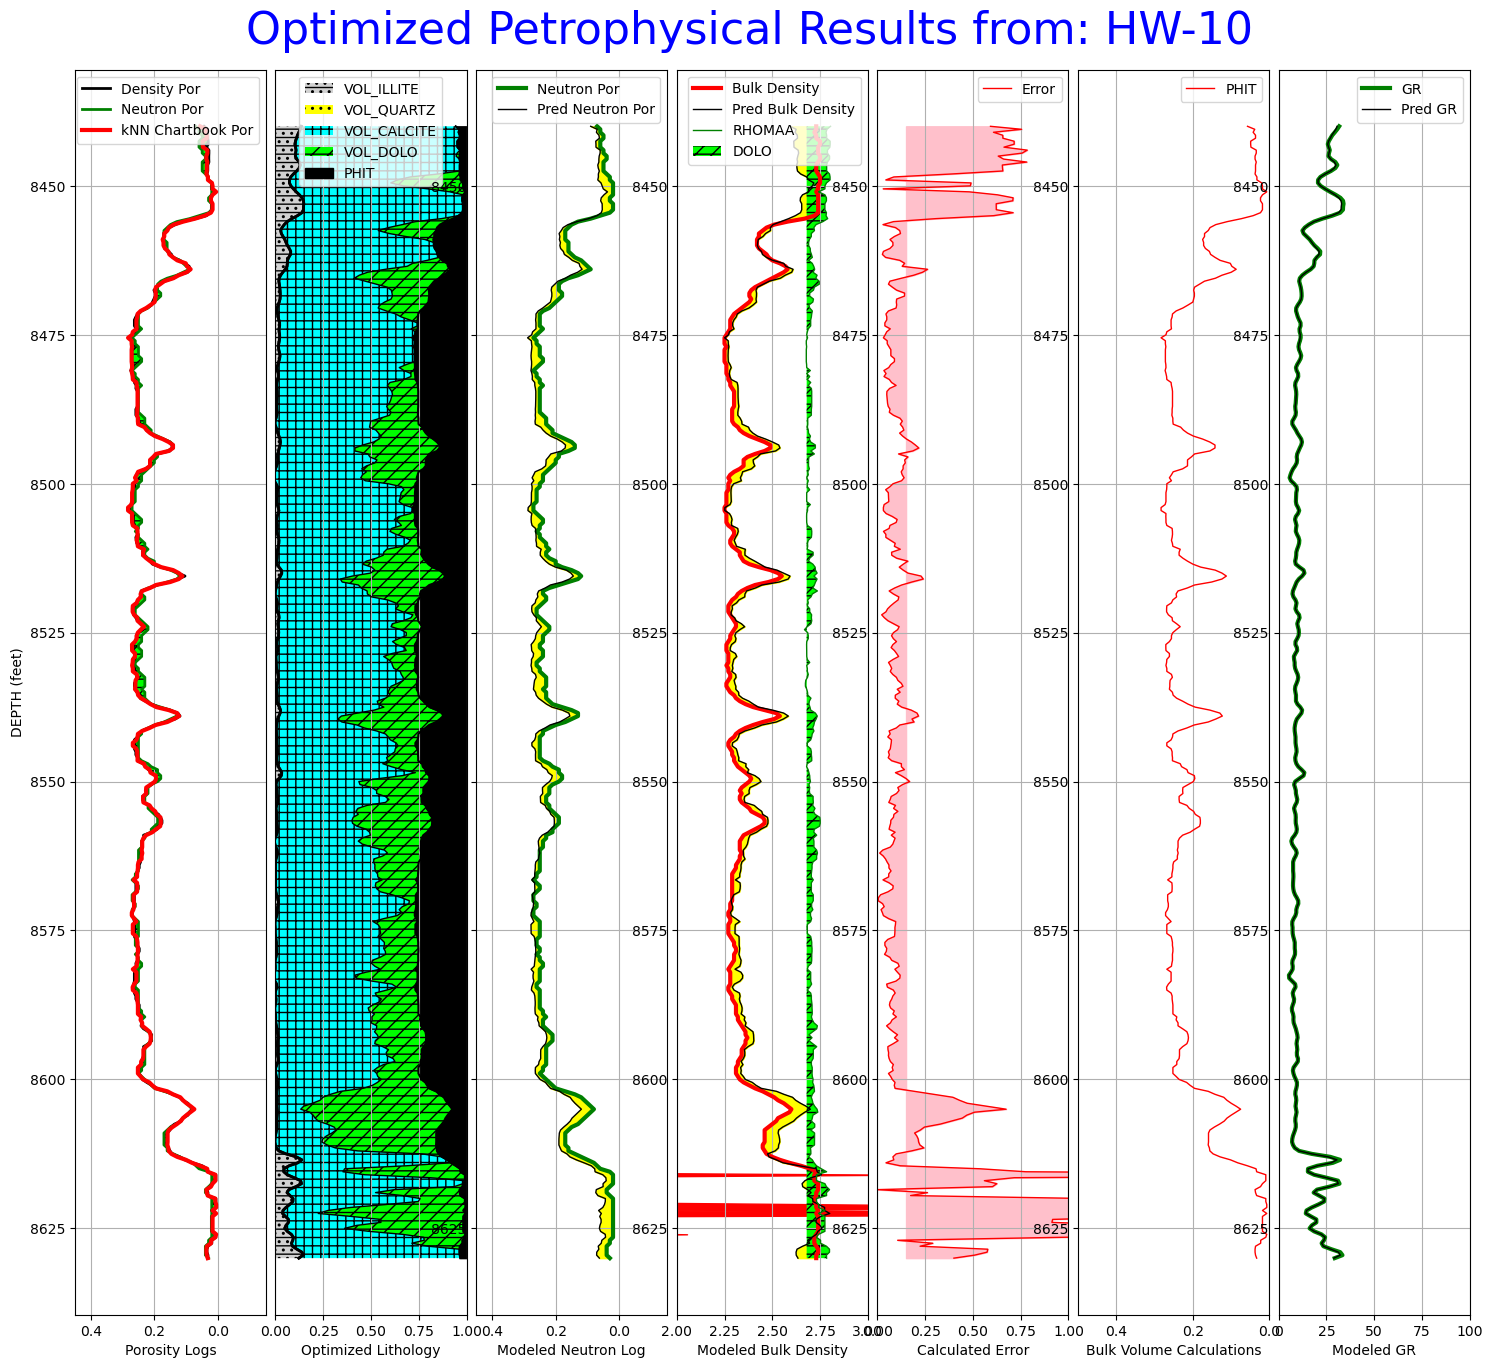

In [18]:
from scipy.optimize import minimize


'''
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            Start Code for Scipy Optimization using minimization
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
'''
VOL_QUARTZ = []
VOL_CALCITE = []
VOL_DOLO = []
porden =[]
VOL_ILLITE = []
tnph = []
#bvw = []
#bvo=[]
#swt = []

rhob_theoretical = []
tnph_theoretical = []
gr_theoretical = []
error = []


'''
deptharray.append(Dep[k]);          # Taken from logs
RHOMAA_array.append(RHOMAA[k]);     # Taken from Log data
Porosity_array.append(Porosity[k]); # Taken from log data
porarray.append(por_est_knn);       # Calculated from logs 
rhoarray.append(rhomatrix_est_knn); # Calculated from logs
'''
    
#log Data
for k in range(0,len(df_log) ,1):  

    TNPH    = CNL[k]
    RHOB2   = RHOB[k]
    GR      = gr[k]
    ILD     = ild[k]
    PHIT    = porarray[k]
    RHOMAA2 = rhoarray[k]

    PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

    # =================================================================================
    #       Saturation Calculations
    # =================================================================================
    #BVW = PHIT*((1/PHIT**m) * (rw/ILD) )**(1/n)

    #if BVW > PHIT:
    #    BVW=PHIT
    #else:
    #    BVW=BVW

    #Swt = BVW/PHIT
    #BVO = (PHIT*(1-Swt))
    #bvo.append(BVO)
    #swt.append(Swt)    
    #bvw.append(BVW)    
    
    # =================================================================================
    #       Illite Option Calculations
    # =================================================================================
    if illite_option == 'yes':
        vol_illite = -0.0424035 + 0.00562239*GR
        illite     = vol_illite/(1-PHIT)
    else:
        vol_illite = 0
        illite     = 0

        
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##         Scipy Optimization for Lithology of Calcite and Dolomite
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    if lith_option == 'Calcite_Dolomite' :   
        

        # Function to minimize
        def optimization_function(xy):
            RHOB_theoretical = (2.52*illite  + 2.71*xy[0] + 2.85*xy[1])*(1-PHIT) + 1.2*PHIT
            TNPH_theoretical = (0.247*illite + 0*xy[0] + 0.05375*xy[1])*(1-PHIT) + 1.0*PHIT    
            GR_theoretical   = (160*illite + 11*xy[0] + 8*xy[1])*(1-PHIT) + 0.0*PHIT
            return (RHOB2 - RHOB_theoretical)**2 + (TNPH - TNPH_theoretical)**2 + (GR - GR_theoretical)**2

        # constraints

        # bounds
        #bnds = [ (0.05, 1), (0, 1 - 0.05 - 0.05)]
        # Bounds x is 0 to 1 and y is 0 to 1
        bnds = [(0.0, 1.0),(0.0, 1.0)]

                    # constraints
        cons = [
            {'type': 'eq',   'fun': lambda x: illite + x[0] + x[1] - 1}, # sum of xy[0], xy[1] must be equal to 1
            #{'type': 'eq',   'fun': lambda x: (illite + x[0] + x[1])*(1-PHIT) + PHIT - 1}, # sum of xy[0], xy[1] must be equal to 1 
            {'type': 'ineq', 'fun': lambda x: x[0] - 0.001}, # xy[0] must be greater than or equal to 0.01
            {'type': 'ineq', 'fun': lambda x: x[1] - 0.001} # xy[1] must be greater than or equal to 0.01
            ]


        result = minimize(optimization_function, x0=[0, 0], constraints = cons, bounds=bnds, method='SLSQP', options={'maxiter': 1000})
        xy_optimal = result.x
                      
        x = xy_optimal[0]
        y = xy_optimal[1]
          
  
        VOL_ILLITE.append(vol_illite)             
        VOL_QUARTZ.append(0)
        VOL_CALCITE.append(x*(1-PHIT))
        VOL_DOLO.append(y*(1-PHIT))

        rhob_theoretical.append(( 2.52*illite  + 2.71*x   +   2.85*y)*(1-PHIT) + FD*PHIT)
        tnph_theoretical.append((0.247*illite  +  0*x     +   0.05375*y)*(1-PHIT) +    PHIT)
        gr_theoretical.append((160*illite +  11*x     +   8*y)        *(1-PHIT) + 0.0*PHIT)
        
        #print('Theoretical RHOB =' , round(rhob_theoretical, 3)  , ', RHOB =',RHOB2)                     

        
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##       Scipy Optimization for Lithology of Quartz, Cakcite and Dolomite
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================    
    elif lith_option == 'Quartz_Calcite_Dolomite' :   
        if RHOMAA2 > 2.0:

            

            def optimization_function(xy):
                RHOB_theoretical = (2.52*illite + 2.65*xy[0] + 2.71*xy[1] + 2.85*xy[2])*(1-PHIT) + 1.2*PHIT
                TNPH_theoretical = (0.247*illite -0.05*xy[0] + 0*xy[1] + 0.05375*xy[2])*(1-PHIT) + 1.0*PHIT 
                GR_theoretical   = (160*illite + 1*xy[0] + 11*xy[1] + 8*xy[2])*(1-PHIT) + 0.0*PHIT
                return (RHOB2 - RHOB_theoretical)**2 + (TNPH - TNPH_theoretical)**2 + (GR - GR_theoretical)**2

            # constraints

            # bounds
            bnds = [(0, 1), (0, 1), (0, 1)]
            
            # constraints
            cons = [
                {'type': 'eq', 'fun': lambda x: illite + x[0] + x[1] + x[2] - 1}, # sum of xy[0], xy[1], xy[2] must be equal to 1
                {'type': 'ineq', 'fun': lambda x: x[0] - 0.001}, # xy[0] must be greater than or equal to 0.01
                {'type': 'ineq', 'fun': lambda x: x[1] - 0.001}, # xy[1] must be greater than or equal to 0.01
                {'type': 'ineq', 'fun': lambda x: x[2] - 0.001}  # xy[1] must be greater than or equal to 0.01 
            ]


            result = minimize(optimization_function, x0=[0, 0, 0], constraints=cons, bounds=bnds, method='SLSQP', options={'maxiter': 1000})

            xy_optimal = result.x
            
            
            x = xy_optimal[0]
            y = xy_optimal[1]
            z = xy_optimal[2]



            VOL_ILLITE.append(vol_illite)
            VOL_QUARTZ.append(x*(1-PHIT))
            VOL_CALCITE.append(y*(1-PHIT))
            VOL_DOLO.append(z*(1-PHIT))
                      
            rhob_theoretical.append((2.520*illite + 2.65*x + 2.71*y + 2.85*z)*(1-PHIT) + 1.2*PHIT)
            tnph_theoretical.append((0.247*illite - 0.05*x + 0.0*y  + 0.05373*z)*(1-PHIT) + 1.0*PHIT)
            gr_theoretical.append((160*illite + 1*x +  11*y     +   8*z)        *(1-PHIT) + 0.0*PHIT)
            #print('Theoretical RHOB =' , round(rhob_theoretical, 3)  , ', RHOB =',RHOB2)                     
            
            
            
        else:

            VOL_ILLITE.append(vol_illite)
            VOL_QUARTZ.append(1-PHIT)
            VOL_CALCITE.append(0)
            VOL_DOLO.append(0)
            
            rhob_theoretical.append(0)
            tnph_theoretical.append(0)
            error.append(0)       

                       
    porden.append(PORDEN)   
    tnph.append(TNPH)
               
    rhob_norm = (RHOB[k] - 1.9)/(3.0 - 1.9)
    rhob_norm_theo = (rhob_theoretical[k] - 1.9)/(3.0 - 1.9)
    tnph_norm = ( CNL[k] - (-0.05))/(0.6 - (-0.05))
    tnph_norm_theo = (tnph_theoretical[k] - (-0.05))/(0.6 - (-0.05))    
    gr_norm = ( gr[k] -  0)/(150 - 0)
    gr_norm_theo = (gr_theoretical[k] - 0)/(150 - 0)    
    

    error.append(0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo))/(PHIT))

'''
# =============================================================================
#      Display Optimization Petrophysics
# ============================================================================='''
Optimization_plot()

In [19]:
logs=df_log

logs['PHIT'] = porarray

logs.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM,DEPT,PHIT
DEPT,,,,,,,,,,,,
8440.0,31.66,2.73,0.07,NaN,0.0,17.62,NaN,NaN,NaN,NaN,8440.0,0.056559
8440.5,30.61,2.73,0.06,NaN,0.0,19.01,NaN,NaN,NaN,NaN,8440.5,0.037629
8441.0,29.37,2.72,0.06,NaN,0.0,20.33,NaN,NaN,NaN,NaN,8441.0,0.041813
8441.5,28.05,2.73,0.05,NaN,0.0,21.58,NaN,NaN,NaN,NaN,8441.5,0.035585
8442.0,27.10,2.73,0.05,NaN,0.0,22.79,NaN,NaN,NaN,NaN,8442.0,0.035585


Column
    [0] Column
        [0] FloatSlider(end=3.0, format=PrintfTickFormatter(id='36..., name="Cementation E..., start=1.0, step=0.01, value=2)
        [1] FloatSlider(end=3.0, format=PrintfTickFormatter(id='4a..., name="Saturation Exponent '..., start=1.0, step=0.01, value=2)
        [2] FloatSlider(end=0.1, format=PrintfTickFormatter(id='bd..., name='Rw = ', start=0.01, step=0.001, value=0.03)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00122')
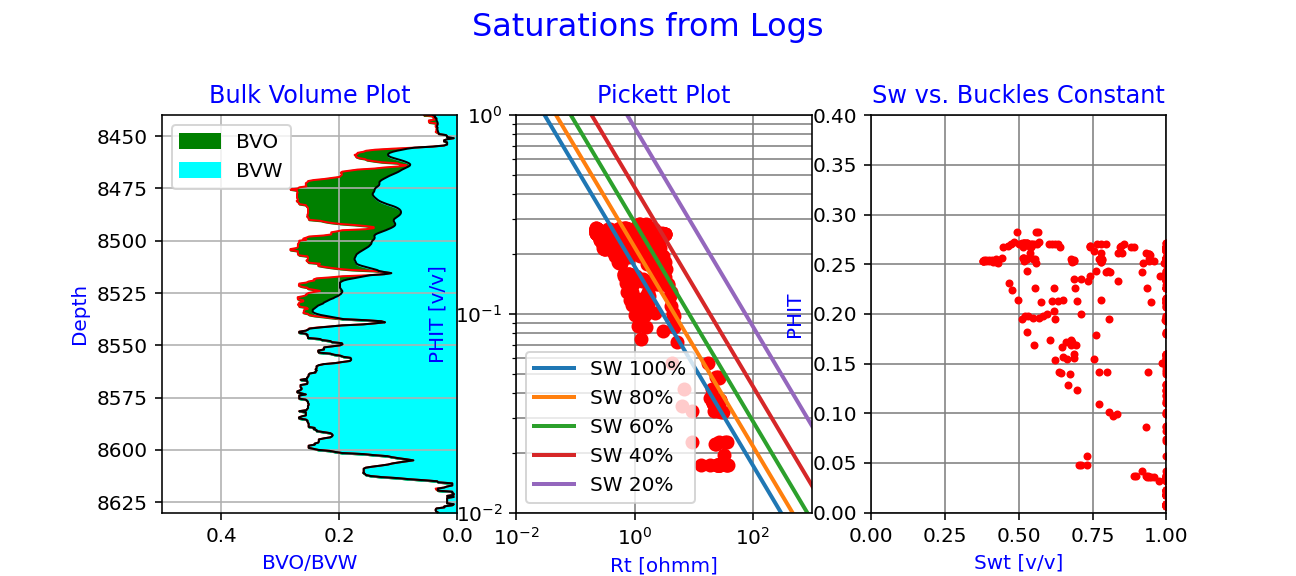

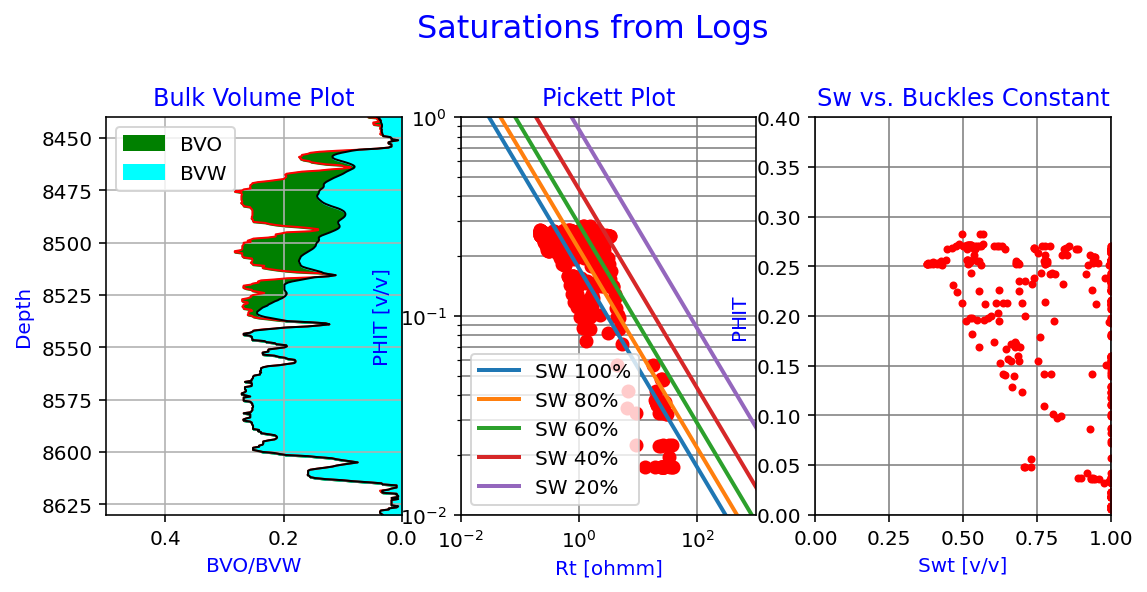

In [20]:
def Plot_Swb( m, n, rw):
    
    ild = logs['RT'].to_numpy()
    phit = logs['PHIT'].to_numpy()
    #qv=logs['Qv'].to_numpy()
 
    bvw = []
    bvo=[]
    swt = []
    #mstarapp = []


    #log Data
    for k in range(0,len(logs) ,1):  

        #TNPH    = CNL[k]
        #RHOB2   = RHOB[k]
        #GR      = gr[k]
        ILD     = ild[k]
        PHIT    = phit[k]
        #QV      = qv[k]
        #RHOMAA2 = rhoarray[k]

        #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

        # =================================================================================
        #       Saturation Calculations
        # =================================================================================
        BVW = PHIT * ( (1/PHIT**m) * (rw/ILD) )**(1/n)

        if BVW > PHIT:
            BVW=PHIT
        else:
            BVW=BVW

        Swt = BVW/PHIT
        BVO = (PHIT*(1-Swt))
        #MSTARAPP = np.log10(rw/(ILD*(1+rw*B*QV))) / np.log10(PHIT)
        bvo.append(BVO)
        swt.append(Swt)    
        bvw.append(BVW)    
        #mstarapp.append(MSTARAPP)
        #Mstarrapp = Mstarapp(rw,ILD, B, QV, logs['PHIT'].to_numpy())

    #fig, axs = plt.subplot_mosaic([['left', 'middle','right'],['bottom', 'bottom','bottom']])
    fig, axs = plt.subplot_mosaic([['left', 'middle','right']])

                              #constrained_layout=True)

    #fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
    fig.suptitle('Saturations from Logs',color='blue' , fontsize=16)
    fig.subplots_adjust(top=0.8 ,wspace=0.2, hspace =.15)
    fig.set_figheight(4)
    fig.set_figwidth(9)
   

    y=logs.DEPT

    # Depth Plot 
    axs['left'].plot(logs.PHIT, y,'-r', lw=1)#, label= 'PHIT')
    axs['left'].plot(bvw, y,'-k', lw=1)#, label= 'BVW')
    axs['left'].set_title("Bulk Volume Plot",color='blue')    
    axs['left'].set_xlabel("BVO/BVW",color='blue')
    axs['left'].set_ylabel("Depth",color='blue')
    axs['left'].set_xlim(0.5, 0.0)
    axs['left'].set_ylim(max(y), min(y))
    axs['left'].fill_betweenx(y,logs.PHIT,bvw, color='green', label= 'BVO')
    axs['left'].fill_betweenx(y,bvw,0, color='cyan', label= 'BVW')
    axs['left'].legend()
    axs['left'].grid()

    # Mstar Plot
    axs['right'].set_title('Sw vs. Buckles Constant', color = 'blue')
    axs['right'].plot(swt,logs.PHIT,'r.',label='')   
    axs['right'].set_xlim(0.0,1.0)
    axs['right'].set_ylim(0,0.4)
    axs['right'].set_ylabel('PHIT', color = 'blue')
    axs['right'].set_xlabel('Swt [v/v]', color = 'blue')
    axs['right'].grid(True, which='both',ls='-',color='gray')
    
    # Pickett Plot
    axs['middle'].loglog(logs.RT,logs.PHIT, 'ro')
    axs['middle'].set_xlim(0.01,1000)
    axs['middle'].set_ylim(0.01,1)
    axs['middle'].set_title('Pickett Plot', color = 'blue')
    axs['middle'].set_ylabel('PHIT [v/v]', color = 'blue')
    axs['middle'].set_xlabel('Rt [ohmm]', color = 'blue')
    axs['middle'].grid()
    
    #calculate the saturation lines
    sw_plot=(1.0,0.8,0.6,0.4,0.2)
    phit_plot=(0.01,1)
    rt_plot=np.zeros((len(sw_plot),len(phit_plot)))

    for i in range (0,len(sw_plot)):
        for j in range (0,len(phit_plot)):
            rt_result=((rw)/(sw_plot[i]**n)*(1/(phit_plot[j]**m)))
            rt_plot[i,j]=rt_result      
    for i in range(0,len(sw_plot)):
        axs['middle'].plot(rt_plot[i],phit_plot, linewidth=2, label='SW '+str(int(sw_plot[i]*100))+'%')
        axs['middle'].legend (loc='best')
    axs['middle'].grid(True, which='both',ls='-' ,color='gray')

    
    phit_buck_plot = (0.05,0.07,0.1,0.15,0.2,0.25,0.3,0.35)
    sw_buck_plot   = (1,0.75,0.5,0.33,0.25,0.2,0.16,0.14)

    #plt.show()
    
    # use return fig to see plots
    return fig




'''
Panel Version
'''

#float_slider = pn.widgets.FloatSlider(name='Float Slider', start=0, end=3.141, step=0.01, value=1.57)
m_slider  = pn.widgets.FloatSlider(name="Cementation Exponent 'm_cem' = ", start=1.00, end=3.00, step=0.01, value=2, format=PrintfTickFormatter(format='%.2f'))
n_slider  = pn.widgets.FloatSlider(name="Saturation Exponent 'n_sat' = ", start=1.00, end=3.00, step=0.01, value=2, format=PrintfTickFormatter(format='%.2f'))
rw_slider = pn.widgets.FloatSlider(name='Rw = ', start=0.01, end=0.1, step=0.001, value=.03, format=PrintfTickFormatter(format='%.3f'))


pn.interact(Plot_Swb, m = m_slider, n = n_slider, rw = rw_slider)
#pane  = pn.interact(bvw_plot, m = m_slider, n = n_slider, rw = rw_slider, mslope = mslope_slider)


In [21]:
print()
print('Electrical Properties: m =',m_slider.value, ', n =',n_slider.value, ', Rw =',round(rw_slider.value,3) )



Electrical Properties: m = 2 , n = 2 , Rw = 0.015
